# IGA-07. Linear regression analysis

**Students**
- Magomedova Zamira
- Makarkina Irina
- Markov Danil
- Tanco Aguas Vicente


## Setup of the problem

In this IGA you are asked to run a pair-wise linear regression analysis.

The attached file **RD_Sales.xlsx** contains the data on research and development expenditures (**rd**, dependent variable) and sales (**sales**, independent variable) for 18 industry groupings (variable industry) in the United States (all figures are in millions of dollars). 

Use the **5% level of significance** for statistical inference.


In [1]:
# load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# packages for statistical analysis 
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import reset_ramsey
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# import the data here
df_sales = pd.read_excel('RD_Sales.xlsx', 'data', index_col=None, na_values=['NA'])
df_sales.head(n=5)


,industry,rd,sales
0,Packaging,62.5,6375.3
1,Non-bank financial,92.9,11626.4
2,Service,178.3,14655.1
3,Metals,258.4,21869.2
4,Construction,494.7,26408.3


## Task 1. (1 point)
**Run a descriptive analysis of the dataset and give comments.**

In [3]:
# provide a summary on the data
df_sales.describe().round(2)

,rd,sales
count,18.00,18.00
mean,3056.86,89775.32
std,3705.97,80344.98
min,62.50,6375.30
25%,439.95,27907.62
50%,1607.95,75657.20
75%,4320.23,120772.10
max,13210.70,293543.00


In [4]:
# run a pair-wise correlation analysis
rd = df_sales['rd']
sales = df_sales['sales']
XX = df_sales[['rd', 'sales']]
XX.corr().round(3)

,rd,sales
rd,1.000,0.692
sales,0.692,1.000


In [5]:
coefPears, pvPears=stats.pearsonr(rd, sales) #correlation test

print("Pearson's correlation = ", round(coefPears,3))
print("Pearson's p-value = ", round(pvPears,3))

Pearson's correlation =  0.692
Pearson's p-value =  0.001


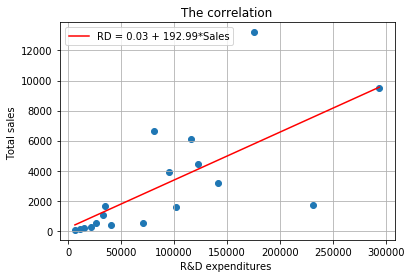

In [7]:
# construct a scatter plot
plt.scatter(sales, rd)
plt.xlabel("R&D expenditures ")
plt.ylabel("Total sales ")
plt.title("The correlation")
plt.grid()

#regression part
slopeY, interceptY, _, _, _ = stats.linregress(sales, rd)
lineY = slopeY*sales+interceptY
plt.plot(sales, lineY, 'r', label='RD = {:.2f} + {:.2f}*Sales'.format(slopeY,interceptY))
#end

plt.legend()
plt.show()

1. The correlation analysis: H0: no correlation between variables; H1: there is correlation between variables. P-value is < 5%, so we reject the H0. So statistical tests show that there is a statistically significant positive correlation between the expenditures on R&D and sales.
2. The scatter plot shows that there is  correlation between two variables, seeing as all the values are scattered and the regression line is linear, which means that there is linear relationship between these variables. On average, the R&D increases when Sales increase.

## Task 2. (1.5 points)
**Estimate the following linear pair-wise regression Model 1:**

$RD_i = \beta_0+\beta_1 \cdot Sales_i + u_i$

**and run the necessary tests. Give comments.**

In [8]:
# provide estimation code here
X = sm.add_constant(sales) #adding constant
X.head()

model1 = sm.OLS(rd, X).fit() #building a linear regression model

# Print out the statistics
model1.summary()

/Users/useruser/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/useruser/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rd   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     14.67
Date:                Thu, 17 Oct 2019   Prob (F-statistic):            0.00148
Time:                        19:27:44   Log-Likelihood:                -167.09
No. Observations:                  18   AIC:                             338.2
Df Residuals:                      16   BIC:                             340.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        192.9931    990.986      0.195      0.848   -1907.803    2293.789
sales          0.0319      0.008      3.830      0.001       0.014       0.050
==============================================================================
Omnibus:                        8.587   Durbin-Watson:                   3.016
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                6.571
Skew:                           0.823   Prob(JB):                       0.0374
Kurtosis:                       5.460   Cond. No.                     1.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# provide tests here
resids1 = model1.resid # storing residuals in another variable
resids1.head()

0   -333.867299
1   -470.979135
2   -482.195672
3   -632.227860
4   -540.726659
dtype: float64

In [10]:
# The Shapiro-Wilk normality test
SW_test = pd.DataFrame(stats.shapiro(resids1), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value'])

print('\n --- The Shapiro-Wilk normality test ---')
print(SW_test)


 --- The Shapiro-Wilk normality test ---
                         value
chi^2 test statistic  0.863718
chi^2 test p-value    0.014043


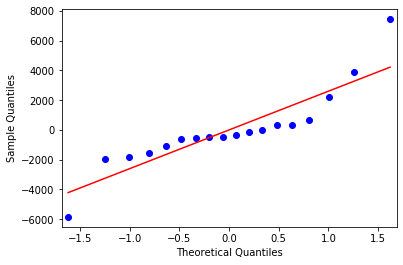

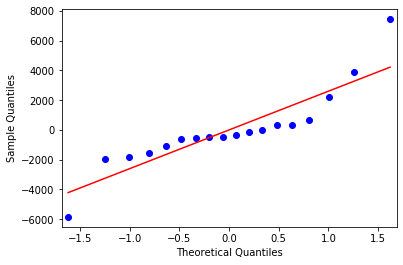

In [11]:
# Visual Normality Test
qqplot(resids1, line='s')

In [12]:
# The Breusch-Pagan heteroskedasticity test

bp_test = pd.DataFrame(sms.het_breuschpagan(resids1, model1.model.exog), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Pagan test ---')
print(bp_test)


 --- The Breusch-Pagan test ---
                         value
chi^2 test statistic  3.995197
chi^2 test p-value    0.045630
F-test statistic      4.564374
F-test p-value        0.048439


In [13]:
# The RESET test
reset = reset_ramsey(model1, degree=3) 
print(reset)

<F test: F=array([[0.51603832]]), p=0.6078037555275958, df_denom=14, df_num=2>


- Normality test:

P-value of S-W normality test is 1.4%, which is < 5%, which means that we have to reject the H0, that states that the distribution is normal, so the distribution is not normal. 

The qq-plot shows that the distribution is closer to normal.

- Heteroskedasticity:

H0: variance is constant. H1: variance is not constant. Both p-values are <5%, but very very close to 5, but we still reject the H0. Conclusion: variance is not constant, there is heteroskedasticity.

- RESET: 

H0: chosen linear specification is correct (we have not missed some nonlinear transformation); H1: chosen linear specification is not correct (we have missed sth nonlinear). p-value = 60%, which is > 5%, so we must accept the H0, which states that the specification is correct

Model:

The R-squared of the model is 47.8%, which means that the value is not that good. It could be because the sample is very small, with only 18 observations.

The coefficient of SALES is 0.0319, and its p-value is 0.1%, which is < 5%, so it's statistically significant.

## Task 3. (1.5 points)
**Estimate the following log-linear pair-wise regression Model 2:**

$log(RD)_i = \gamma_0+\gamma_1 \cdot log(Sales)_i + \varepsilon_i$

**and run the necessary tests. Give comments.**

In [14]:
# provide estimation code here
# take log of 
logcons = np.log(df_sales[['rd']]) 
logcons.columns = ['logrd']

# transform the regressors
XXL = np.log(df_sales[['sales']])
XXL.columns = ['logsales']

# add a constant term as a regressor
XXL = sm.add_constant(XXL)

XXL.head()

,const,logsales
0,1.0,8.760186
1,1.0,9.361034
2,1.0,9.592544
3,1.0,9.992835
4,1.0,10.181434


In [15]:
# Estimate the logarithmic regression
model2 = sm.OLS(logcons, XXL).fit()

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logrd   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     61.92
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           6.87e-07
Time:                        19:28:02   Log-Likelihood:                -19.308
No. Observations:                  18   AIC:                             42.62
Df Residuals:                      16   BIC:                             44.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3647      1.848     -3.985      0.001     -11.282      -3.447
logsales       1.3222      0.168      7.869      0.000       0.966       1.678
==============================================================================
Omnibus:                        0.315   Durbin-Watson:                   2.399
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.355
Skew:                          -0.260   Prob(JB):                        0.837
Kurtosis:                       2.550   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# provide tests here
resids2 = model2.resid
resids2.head()

0   -0.083204
1   -0.481310
2   -0.135477
3   -0.293716
4    0.106354
dtype: float64

In [17]:
# The Shapiro-Wilk normality test
SW_test = pd.DataFrame(stats.shapiro(resids2), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value'])

print('\n --- The Shapiro-Wilk normality test ---')
print(SW_test)


 --- The Shapiro-Wilk normality test ---
                         value
chi^2 test statistic  0.975880
chi^2 test p-value    0.897962


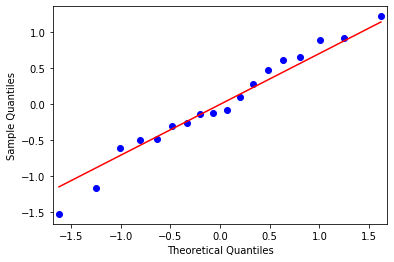

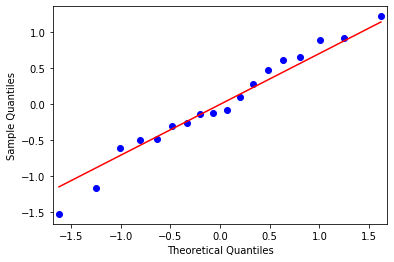

In [18]:
# Visual Normality Test
qqplot(resids2, line='s')

In [19]:
# The Breusch-Pagan heteroskedasticity test

bp_test = pd.DataFrame(sms.het_breuschpagan(resids2, model2.model.exog), columns=['value'], 
                       index=['chi^2 test statistic', 'chi^2 test p-value', 'F-test statistic', 'F-test p-value'])

print('\n --- The Breusch-Pagan test ---')
print(bp_test)


 --- The Breusch-Pagan test ---
                         value
chi^2 test statistic  2.549180
chi^2 test p-value    0.110352
F-test statistic      2.639787
F-test p-value        0.123751


In [20]:
# The RESET test
reset = reset_ramsey(model2, degree=3) 
print(reset)

<F test: F=array([[0.7038561]]), p=0.5113628169028527, df_denom=14, df_num=2>


- Normality test:

P-value of S-W normality test is 89%, which is > 5%, which means that we have to accept the H0, that states that the distribution is normal, so the distribution is  normal. 

The qq-plot shows that the distribution is closer to normal.

- Heteroskedasticity:

H0: variance is constant. H1: variance is not constant. Both p-values are >5%, 11% and 12% respectively , so we accept the H0. Conclusion: variance is  constant, there is homoskedasticity.

- RESET: 

H0: chosen linear specification is correct (we have not missed some nonlinear transformation); H1: chosen linear specification is not correct (we have missed sth nonlinear). p-value = 51%, which is > 5%, so we must accept the H0, which states that the specification is correct

Model:

The R-squared of the model is 79.5%, which means that the value is better that before, but still could be better. Other regressors should be added to improve the model. 

The coefficient of LOGSALES is 1.3222, and its p-value is 0%, which is < 5%, so it's statistically significant.